# Visualizing titanic dataset

**Task 0:** Let's Import all necessary libraries and read titanic.csv

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
sns.set_context('talk')

dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1:** What is the survival rate among men / women?

In [14]:
surv = dataset[dataset.Survived == 1].Sex.value_counts()
all_pass = dataset.Sex.value_counts()

man_perc = round(surv[1]/all_pass[0]*100,1)
print('Відсоток виживання серед чоловіків: ' + str(man_perc) + '%')

woman_perc = round(surv[0]/all_pass[1]*100,1)
print('Відсоток виживання серед жінок: ' + str(woman_perc) + '%')


Відсоток виживання серед чоловіків: 18.9%
Відсоток виживання серед жінок: 74.2%


**Task 2:** Let's visualize these percentages

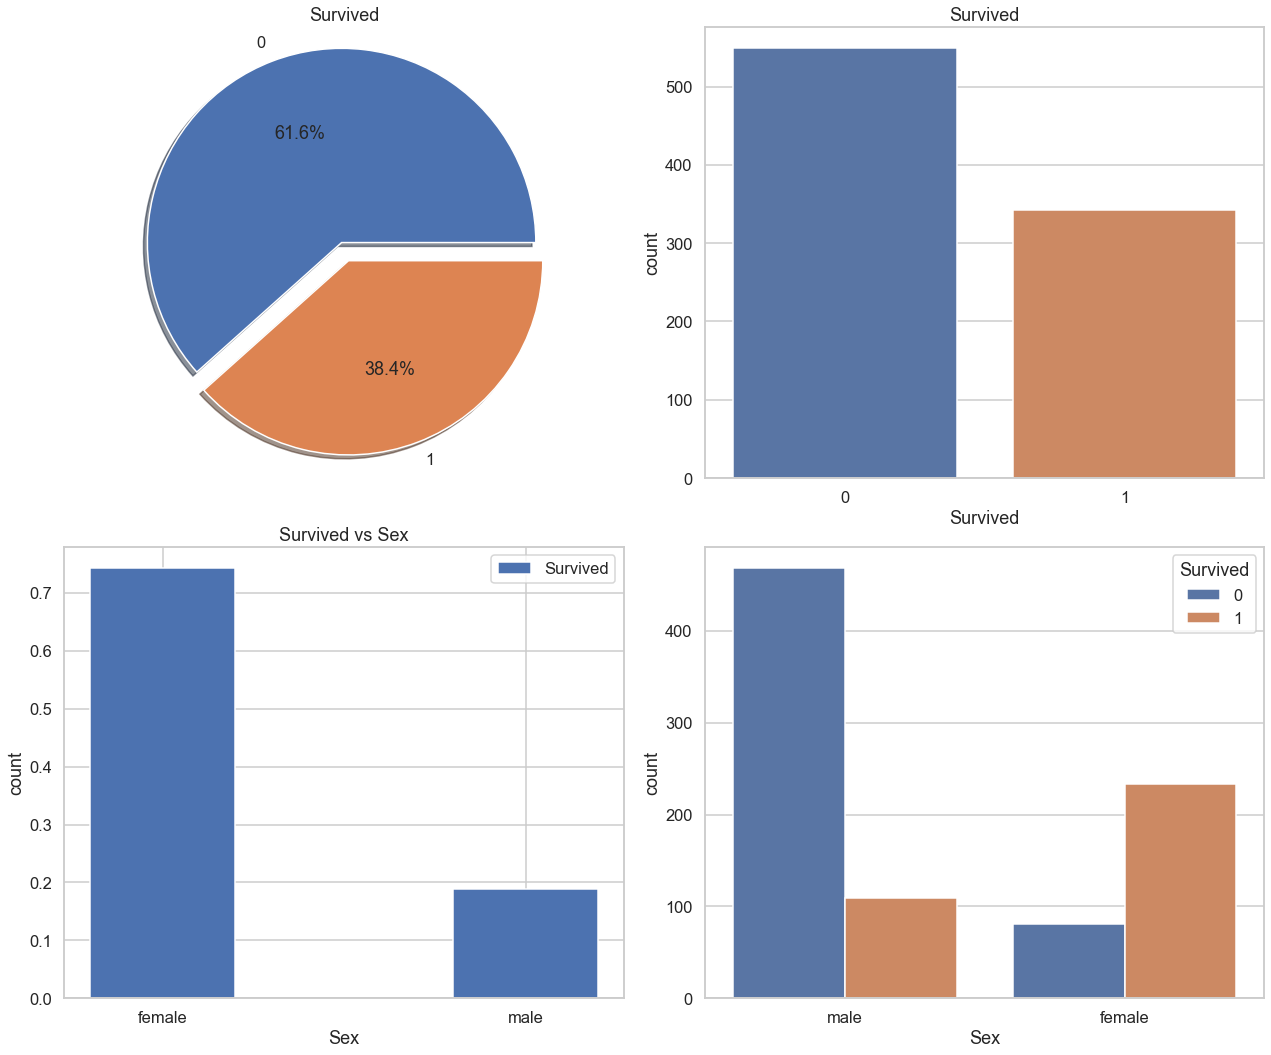

In [28]:
data = dataset.Survived.value_counts()

fig1, ax1 = plt.subplots(2,2,figsize=(18,15))
ax1[0,0].pie(data, explode=[0.0,0.1], labels=['0','1'], autopct='%1.1f%%',
        shadow=True)
ax1[0,0].axis('equal') 
ax1[0,0].set_title('Survived')

sns.countplot(x='Survived',data=dataset,ax=ax1[0,1]).set_title('Survived')

ax1[1,0].bar(['female','male'],[woman_perc/100,man_perc/100],width=0.4,label='Survived')
ax1[1,0].set_xlabel('Sex')
ax1[1,0].set_ylabel('count')
ax1[1,0].set_title('Survived vs Sex')
ax1[1,0].legend()

sns.countplot(x='Sex',
             data=dataset,
             hue='Survived'
             )
plt.tight_layout() 



## What we can see from visualizations

- On the first graph and the second graph, we can see the ratio of dead (0) to survivors
(1), on the pie chart we see the percentage, and on the histogram we can see
numerical ratio of dead to survivors

- In the third graph, the histogram, we see the ratio of surviving women to men in the graph
we see that the number of surviving women is much higher (233) than that of men (109)
this can be explained by the fact that women and children were rescued on the Titanic in the first place, only then men

- In the fourth graph we see that most of the men died in the crash (440) as well
survived the catastrophe (109), when more women survived than died



**Task 3:** How many missing values in the dataset for each of the variables?

In [29]:
missing = dataset.isnull().sum() 
missing_value = pd.DataFrame({'missing': missing})
print(missing_value)

             missing
PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2


**Task 4:** Name the most popular **female** name on the ship.

In [30]:
freq = dataset['Name'].str.extract('(Miss\. |Mrs\.[A-Za-z ]*\()([A-Za-z]*)')[1].value_counts() 
print("Printing popular names:") 
print(freq)

dict_freq = dict(freq)
Keymax = max(dict_freq, key=dict_freq.get) 
print('\nThe most popular woman name: ' + Keymax) 

Printing popular names:
Anna         15
Mary         14
Elizabeth    11
Margaret     10
Alice         6
             ..
Aloisia       1
Matilda       1
Stella        1
Julie         1
Roberta       1
Name: 1, Length: 171, dtype: int64

The most popular woman name: Anna


**Task 5:** Name the most popular **male** name on the ship. 

In [31]:
freq = dataset['Name'].str.extract('(Mr\. |Master\.[A-Za-z ]*\()([A-Za-z]*)')[1].value_counts() 
print("Printing popular names:") 
print(freq) 

dict_freq = dict(freq)
Keymax = max(dict_freq, key=dict_freq.get) 
print('\nThe most popular man name: ' + Keymax) 

Printing popular names:
William      30
John         21
George       12
Charles      12
Thomas       11
             ..
Selman        1
Apostolos     1
Philip        1
Nikolai       1
Pekka         1
Name: 1, Length: 263, dtype: int64

The most popular man name: William


**Task 6:** Draw diagrams of the ratio of dead and survivors based on information about which class of tickets the passengers had.

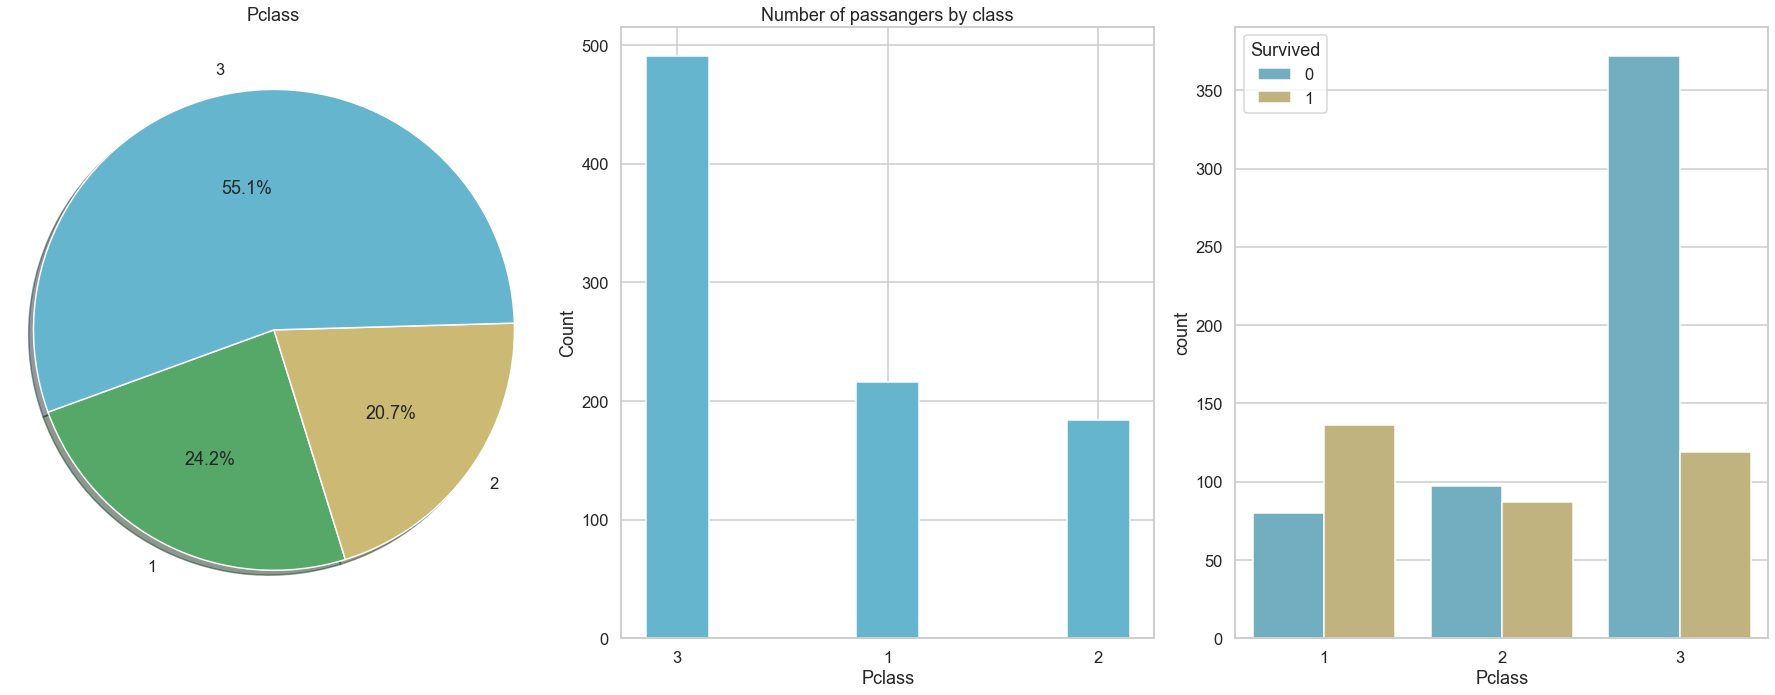

In [33]:
ex = dataset.groupby('Pclass').count()
#print(ex.Ticket)
var = list(ex.Ticket)
labels = [1,2,3]

fig, ax = plt.subplots(1,3,figsize=(25,10))
ax[0].pie(var, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=200,colors=['g','y','c'])
ax[0].axis('equal') 
ax[0].set_title('Pclass')

ax[1].bar(['3','1','2'],sorted(var,reverse=True),width=0.3,color='c')
ax[1].set_xlabel('Pclass')
ax[1].set_ylabel('Count')
ax[1].set_title('Number of passangers by class')

sns.countplot(x='Pclass',
             data=dataset,
             hue='Survived',
             palette=['c','y'])

plt.tight_layout()

## What we can see from visualizations

- On the first graph we see the ratio of tickets, ie what class (comfort) passengers went, as we can see from the graph, most people, more than half (55.1%) went by 3 (cheapest) class

- The second graph shows the same, only in numerical equivalent, where almost 500 people went to the 3rd grade

- The third graph shows mortality and survival in each passenger class, this histogram shows that the most deaths among passengers Pclass=3 because they were the most, so it is obvious that more deaths among these people, perhaps the role was also played by the financial component, because richer people went to higher Pclass


**Task 7:** Let's look at the plots with sns.swarmplot

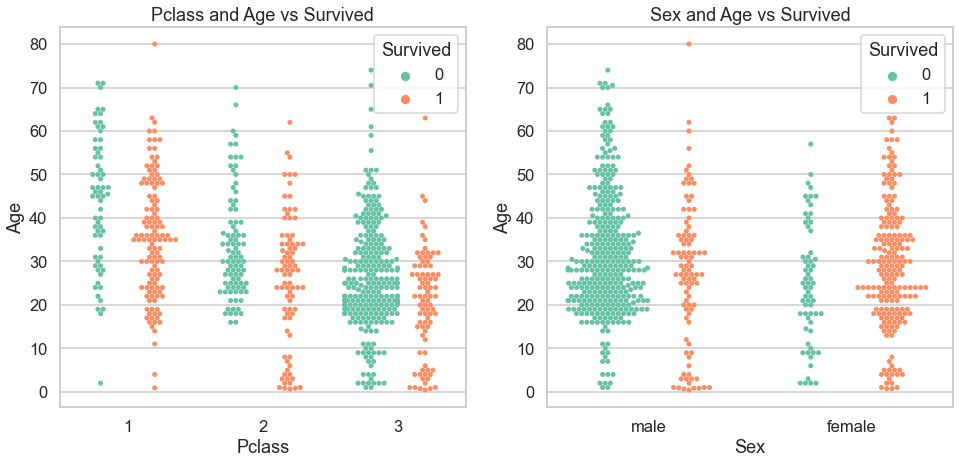

In [34]:
fig,axes = plt.subplots(1,2,figsize=(16,7)) 
axes[0].set_title('Pclass and Age vs Survived')
axes[1].set_title('Sex and Age vs Survived')

sns.swarmplot(ax=axes[0],x='Pclass',y='Age',data=dataset,hue='Survived',size=5,palette='Set2',dodge=True)
sns.swarmplot(ax=axes[1],x='Sex',y='Age',data=dataset,hue='Survived',size=5,palette='Set2',dodge=True)
plt.show()

## What we can see from visualizations

- Drawn a scattering scheme with points that do not overlap, on 1 graph we see that the largest number of deaths is among the third class passengers aged 15 ~ and up to 50, in turn, the largest number of survivors is among the first class aged 15 ~ and up to 60, we can assume that people who could afford a more expensive ticket were more likely to survive due to their financial security, the second passenger class has approximately equal number of dead and survivors, we also see a trend that in 2nd and 3rd grade many children survived up to 10 years, and in the first passenger class children in principle were almost non-existent

- The second graph is simpler, we can see a large number of dead men, when in turn among women, most managed to escape, because they first rescued women and children under 18, but men aged 18-50 ~ quite a lot died when men by 18 still survived the disaster more than died


**Task 8:** Now let's look at the histograms

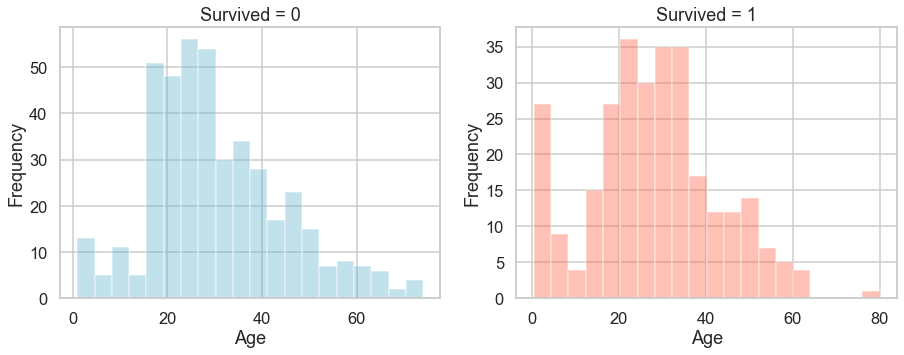

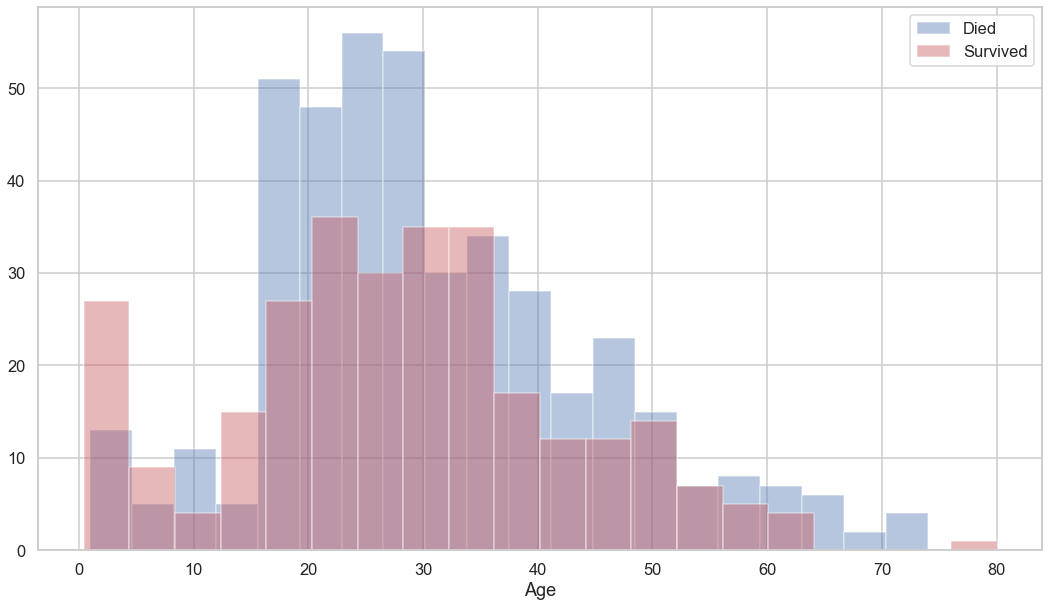

In [35]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

sns.distplot(dataset[dataset['Survived']==0].Age,bins=20, kde=False, color='c', ax=ax[0])
ax[0].set_title('Survived = 0')
ax[0].set_ylabel('Frequency')

sns.distplot(dataset[dataset['Survived']==1].Age,bins=20, kde=False, color='tomato', ax=ax[1])
ax[1].set_title('Survived = 1')
ax[1].set_ylabel('Frequency')

plt.figure(figsize=(18,10))
sns.distplot(dataset[dataset['Survived']==0].Age,bins=20, kde=False, color='b',label='Died')
sns.distplot(dataset[dataset['Survived']==1].Age,bins=20, kde=False, color='r',label='Survived')
plt.legend()
plt.show()

## What we can see from visualizations

- The first two distributions are simple diagrams showing the age and number of deaths / survivors according to a certain age range for which each column is responsible.
- In the third chart, we actually see the overlap of the two previous charts to better visualize the overall picture by age ranges and survivors / deaths, as we see the most deaths from 18 to almost 30, then the number of deaths and survivors is more or less the same.
- Well and it seems to me that these data are not enough that it was possible to see any general picture on a dataset and to predict any statistical estimations.

**Task 9:** Let's look at the chances of survival among passengers:

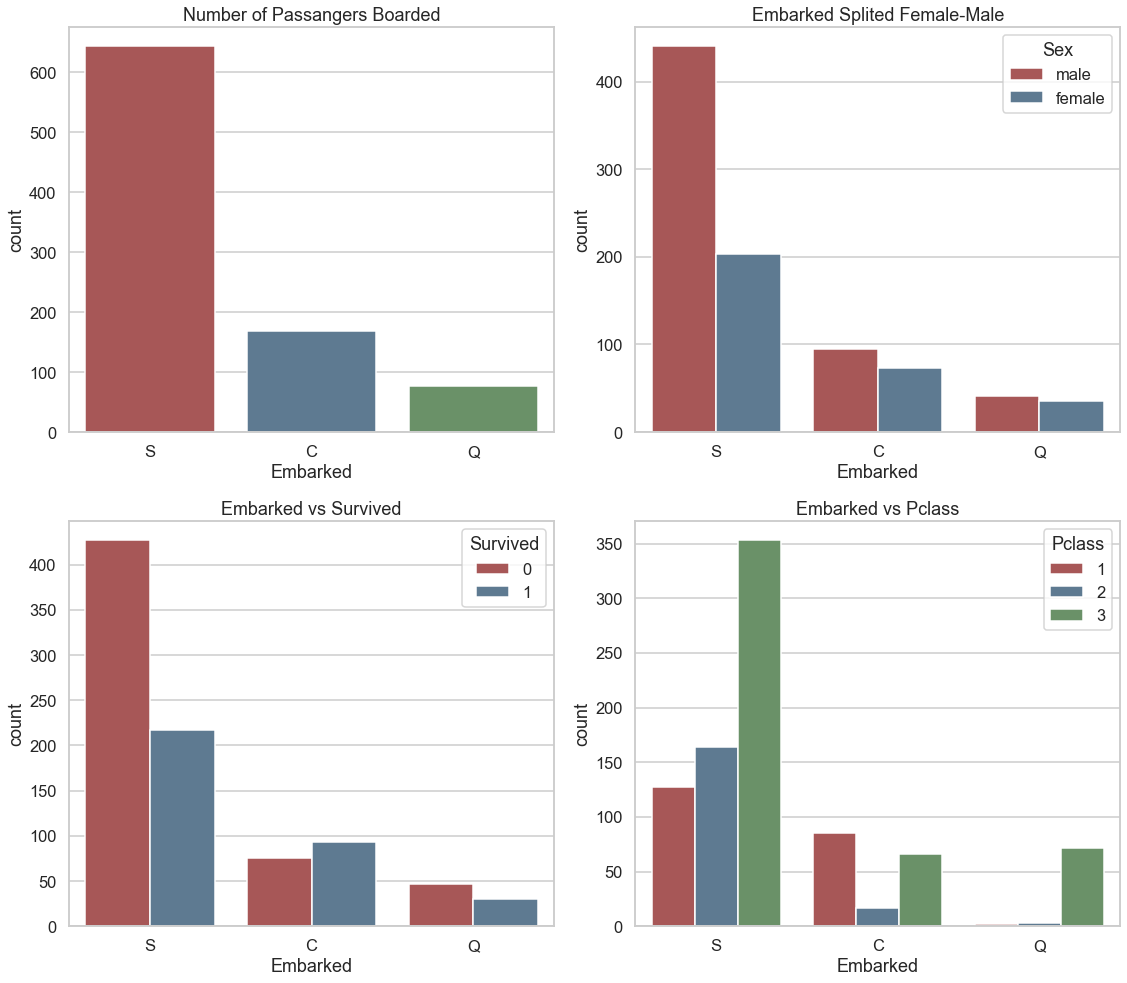

In [37]:
#print(dataset.head())
fig,axes = plt.subplots(2,2,figsize=(16,14))
sns.countplot(x='Embarked',data=dataset,ax=axes[0,0],palette='Set1',saturation=0.4).set_title('Number of Passangers Boarded')

sns.countplot(x='Embarked',data=dataset,hue='Sex',ax=axes[0,1],palette='Set1',saturation=0.4).set_title('Embarked Splited Female-Male')

sns.countplot(x='Embarked',data=dataset,hue='Survived',ax=axes[1,0],palette='Set1',saturation=0.4).set_title('Embarked vs Survived')

sns.countplot(x='Embarked',data=dataset,hue='Pclass',ax=axes[1,1],palette='Set1',saturation=0.4).set_title('Embarked vs Pclass')

plt.tight_layout()

## What we can see from visualizations

We can see that the number of passengers who boarded the Titanic in Q = Queenstown, is the smallest and there were only 3rd class passengers and more than half of them died, this is a normal condition for 3rd class passengers, the largest number of people boarded in S = Southampton and again, most died after the crash there the majority of people consisted of men and 3rd class passengers, but people from C = Cherbourg survived in the majority, more than half, most likely survived most 1st class passengers and women.

**Task 10** Let's look at the distribution of ```ticket price``` according to which class the passenger belongs.

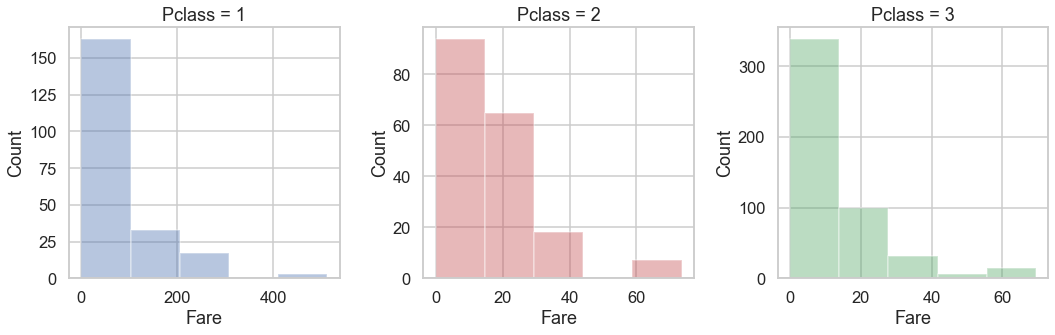

In [39]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.distplot(dataset[dataset['Pclass']==1].Fare, bins=5,kde=False, color='b',ax=axes[0])
axes[0].set_title('Pclass = 1')
axes[0].set_ylabel('Count')

sns.distplot(dataset[dataset['Pclass']==2].Fare, bins=5,kde=False, color='r',ax=axes[1])
axes[1].set_title('Pclass = 2')
axes[1].set_ylabel('Count')

sns.distplot(dataset[dataset['Pclass']==3].Fare, bins=5,kde=False, color='g',ax=axes[2])
axes[2].set_title('Pclass = 3')
axes[2].set_ylabel('Count')

plt.tight_layout()

## What we can see from visualizations

The three graphs show the distribution of ticket prices and the number of these tickets in a certain range, as we can see from the graphs, most tickets were bought at Pclass = 1 in the range of 20 and up to 300 dollars, as well as several people with tickets for 420-500 dollars, although the fashion is around 20-100~ dollars it is more than 160 people. Second class tickets generally cost less than 40~, and people in the third passenger class mostly (almost 350) have tickets cheaper than $20